In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import time
import threading
import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import fpgrowth

Data Loading

In [ ]:
d=data=pd.read_csv("/content/Groceries_dataset.csv")
data.head()

Data Preprocessing

In [ ]:
data.shape

In [ ]:
data.describe()

Checking null values

In [ ]:
data.isna().sum()

Adding column quantity

In [99]:
d['Quantity'] = 1

Converting the dataset

In [ ]:
transactions1 =  d.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')
transactions1

Replace 'NaN' values

In [102]:
transactions1 = transactions1.fillna(0)

Converting data to binary matrix

In [111]:
encoded=pd.get_dummies(pd.DataFrame(transactions1).stack()).sum(level=0)
transactiondf=(encoded>0).astype(int)

Multithreading

In [112]:
apicompleted=threading.Event()
fpcompleted=threading.Event()

In [113]:
exetime=[0,0]

Function to calculate Apriori and FP-Growth

In [122]:
min_supp = float(input("Enter the minimum support threshold: "))
min_conf = float(input("Enter the minimum confidence threshold: "))

Enter the minimum support threshold: 0.2
Enter the minimum confidence threshold: 0.3


In [123]:
def runapi():
  stime=time.time()
  apiresults=apriori(transactiondf,min_support=min_supp,use_colnames=True)
  exetime[0]=time.time()-stime
  apicompleted.set()

In [124]:
def runfp():
  stime=time.time()
  fpresults=fpgrowth(transactiondf,min_support=min_conf,use_colnames=True)
  exetime[1]=time.time()-stime
  fpcompleted.set()

In [125]:
apthread=threading.Thread(target=runapi)
fpthread=threading.Thread(target=runfp)

In [126]:
apthread.start()
fpthread.start()
apicompleted.wait()
fpcompleted.wait()
apthread.join()
fpthread.join()

Visualizing the algorithms

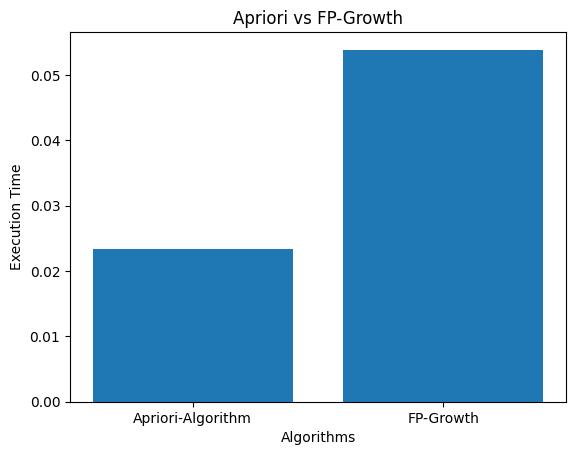

[0.02343463897705078, 0.05385470390319824]
Apriori is Faster


In [127]:
algorithms=['Apriori-Algorithm','FP-Growth']
plt.bar(algorithms,exetime)
plt.xlabel('Algorithms')
plt.ylabel('Execution Time')
plt.title('Apriori vs FP-Growth')
plt.show()
print(exetime)
a=0
if exetime[0]<exetime[1]:
  print("Apriori is Faster")
  a=1

elif exetime[1]<exetime[0]:
  print("FP-Growth is Faster")
  a=2

else:
  print("Both are equal")

Recommendation

In [120]:
if a==1:
  print("Apriori is better for Market basket analysis.")
elif a==2:
  print("FP-Growth is better for Market basket analysis.")
else:
  print("Both have sam result.")

Apriori is better for Market basket analysis.


Assosciation rules based on apriori and fp-growth

In [ ]:
apiresults=apriori(transactiondf,min_support=min_supp,use_colnames=True)
fpresults=fpgrowth(transactiondf,min_support=min_supp,use_colnames=True)

apriori_association_rules = association_rules(apiresults, metric="confidence", min_threshold=min_conf)
print("Association Rules from Apriori Algorithm:")
print(apriori_association_rules)

fp_growth_association_rules = association_rules(fpresults, metric="confidence", min_threshold=min_conf)
print("\nAssociation Rules from FP-Growth Algorithm:")
print(fp_growth_association_rules)